In [1]:
# import libraries for pytorch and data processing
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

In [2]:
# read data from csv file
gc = pd.read_csv("Data/gc_samples_filtered.csv", header=None)
d = pd.read_csv("Data/d_samples_filtered.csv", header=None)

In [3]:
# check number of samples in gc
print("Number of samples in gc: ", len(gc))

Number of samples in gc:  3207


In [4]:
mesh_elasticity_xy = np.load('Data/elasticity/Meshes/Random_UnitCell_XY_10.npy')
input_xy = torch.tensor(mesh_elasticity_xy, dtype=torch.float).permute(2,0,1)

In [5]:
print(mesh_elasticity_xy.shape)
print(input_xy.shape)

(972, 2, 2000)
torch.Size([2000, 972, 2])


In [6]:
mesh_elasticity_rr = np.load('Data/elasticity/Meshes/Random_UnitCell_rr_10.npy')
print("Size of mesh_elasticity_rr: ", mesh_elasticity_rr.shape)

Size of mesh_elasticity_rr:  (42, 2000)


In [7]:
mesh_elasticity_theta = np.load('Data/elasticity/Meshes/Random_UnitCell_theta_10.npy')
print("Size of mesh_elasticity_theta: ", mesh_elasticity_theta.shape)

Size of mesh_elasticity_theta:  (2000, 10)


In [8]:
mesh_elasticity_sigma = np.load('Data/elasticity/Meshes/Random_UnitCell_sigma_10.npy')
print("Size of mesh_elasticity_sigma: ", mesh_elasticity_sigma.shape)

Size of mesh_elasticity_sigma:  (972, 2000)


In [9]:
# an example sample
example = mesh_elasticity_xy[:, :, 0]

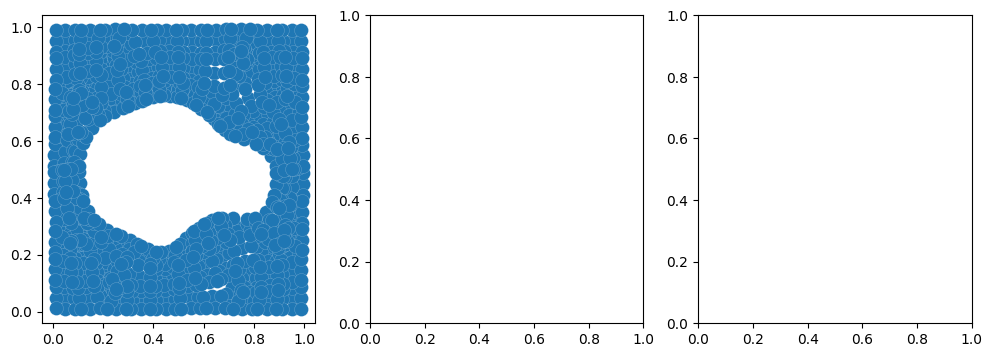

In [10]:
# scatter [:, 0] and [:, 1] of the example
# #        lims = dict(cmap='RdBu_r', vmin=truth.min(), vmax=truth.max())
#         fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
#         ax[0].scatter(XY[:, 0], XY[:, 1], 100, truth, edgecolor='w', lw=0.1, **lims)
#         ax[1].scatter(XY[:, 0], XY[:, 1], 100, pred, edgecolor='w', lw=0.1, **lims)

# color with RdBu_r
lims = dict(cmap='RdBu_r', vmin=example.min(), vmax=example.max())
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].scatter(example[:, 0], example[:, 1], 100, edgecolor='w', lw=0.1, **lims)


In [56]:
mesh_elasticity_rr[:, 0]

array([0.38481788, 0.36257597, 0.3071763 , 0.24932765, 0.22294015,
       0.21486207, 0.21400874, 0.21724417, 0.22394413, 0.23333861,
       0.2437169 , 0.25322109, 0.26105686, 0.26808629, 0.27689481,
       0.29144322, 0.31522788, 0.34581514, 0.37211439, 0.38678412,
       0.39267872, 0.39412207, 0.3924784 , 0.3857709 , 0.3686306 ,
       0.33986599, 0.31324888, 0.30057265, 0.29828709, 0.29504325,
       0.28002824, 0.2523155 , 0.22645724, 0.21328924, 0.2097045 ,
       0.213368  , 0.23347266, 0.2940781 , 0.36053374, 0.38503257,
       0.38961531, 0.38481788])

In [58]:
mesh_elasticity_rr[:, 1]

array([0.20910368, 0.20787176, 0.20795892, 0.21070869, 0.21982551,
       0.24372031, 0.28608664, 0.32614946, 0.34669884, 0.35152579,
       0.34807237, 0.3434114 , 0.3436891 , 0.35026489, 0.35917195,
       0.36581891, 0.36865112, 0.36886054, 0.36925841, 0.37248695,
       0.37815534, 0.38301491, 0.38416586, 0.37858028, 0.35750665,
       0.30835198, 0.25473151, 0.23006127, 0.22772437, 0.24517009,
       0.29052952, 0.34151427, 0.36569631, 0.36748308, 0.34945635,
       0.30677332, 0.25821724, 0.22997492, 0.21826847, 0.21348895,
       0.21097169, 0.20910368])

In [59]:
mesh_elasticity_rr[:, 2]

array([0.23656344, 0.25113765, 0.26545124, 0.2774553 , 0.28758507,
       0.29708425, 0.30621325, 0.31404733, 0.31971049, 0.32370674,
       0.32816084, 0.33557528, 0.34650687, 0.35818001, 0.36640993,
       0.36832905, 0.36141735, 0.34124486, 0.30679813, 0.27252135,
       0.25450664, 0.25530601, 0.27533274, 0.31166057, 0.34628439,
       0.3652567 , 0.37093071, 0.36766659, 0.35734992, 0.34264179,
       0.3280596 , 0.31592743, 0.30389357, 0.28759916, 0.26572155,
       0.24331862, 0.22718393, 0.21885693, 0.21638859, 0.21843373,
       0.2250909 , 0.23656344])